# Problem 1

Set $Y \in \mathbb{R}^n,X\in \mathbb{R}^{n\times p} = [X_1,\dots,X_p],X_i\in \mathbb{R}^{n\times 1}$， $\theta = (\sigma_\epsilon^2,\sigma_\beta^2)$ is unknown.



## Exact Posterior Distribution

Now treat both variance components
$$
\sigma_\varepsilon^2
\quad\text{and}\quad
\sigma_\beta^2
$$
as unknown parameters and estimate them via the EM algorithm, while at the same time obtaining the posterior distribution of $\beta$.

The complete-data log-likelihood for $(y,\beta)$, given
$$
\theta = (\sigma_\varepsilon^2,\sigma_\beta^2),
$$
is
$$
\log p(y,\beta \mid \theta)
= \log p(y\mid \beta,\sigma_\varepsilon^2)
  + \log p(\beta\mid \sigma_\beta^2),
$$
where
$$
\log p(y\mid \beta,\sigma_\varepsilon^2)
= -\frac{n}{2}\log(2\pi\sigma_\varepsilon^2)
  -\frac{1}{2\sigma_\varepsilon^2}\|y-X\beta\|^2,
$$
and
$$
\log p(\beta\mid \sigma_\beta^2)
= -\frac{p}{2}\log(2\pi\sigma_\beta^2)
  -\frac{1}{2\sigma_\beta^2}\|\beta\|^2.
$$

In the EM algorithm we regard $\beta$ as latent. At iteration $t$ we start from
$$
\theta^{(t)} = \bigl(\sigma_{\varepsilon,(t)}^2,\;\sigma_{\beta,(t)}^2\bigr).
$$





### E-step

We compute the conditional distribution
$$
p\bigl(\beta \mid y,\theta^{(t)}\bigr),
$$
which is Gaussian. Writing
$$
A^{(t)}
  = \frac{1}{\sigma_{\varepsilon,(t)}^2} X^\top X
    + \frac{1}{\sigma_{\beta,(t)}^2} I_p,
\qquad
b^{(t)}
  = \frac{1}{\sigma_{\varepsilon,(t)}^2} X^\top y,
$$
we obtain
$$
\Sigma^{(t)} = \bigl(A^{(t)}\bigr)^{-1},
\qquad
\mu^{(t)} = \Sigma^{(t)} b^{(t)},
$$
and hence
$$
p\bigl(\beta \mid y,\theta^{(t)}\bigr)
= N\!\bigl(\beta;\,\mu^{(t)},\Sigma^{(t)}\bigr).
$$
The E-step requires the expectations
$$
\mathbb{E}\bigl[\|\beta\|^2 \mid y,\theta^{(t)}\bigr]
= \|\mu^{(t)}\|^2 + \operatorname{tr}\bigl(\Sigma^{(t)}\bigr),
$$
and
$$
\mathbb{E}\bigl[\|y - X\beta\|^2 \mid y,\theta^{(t)}\bigr]
= \|y - X\mu^{(t)}\|^2
  + \operatorname{tr}\bigl(X\Sigma^{(t)}X^\top\bigr).
$$


### M-step
We maximize the expected complete-data log-likelihood with respect to $\theta$, which yields closed-form updates
$$
\sigma_{\varepsilon,(t+1)}^2
= \frac{1}{n}\,
   \mathbb{E}\bigl[\|y - X\beta\|^2 \mid y,\theta^{(t)}\bigr]
= \frac{1}{n}\Bigl(
      \|y - X\mu^{(t)}\|^2
      + \operatorname{tr}\bigl(X\Sigma^{(t)}X^\top\bigr)
    \Bigr),
$$
and
$$
\sigma_{\beta,(t+1)}^2
= \frac{1}{p}\,
   \mathbb{E}\bigl[\|\beta\|^2 \mid y,\theta^{(t)}\bigr]
= \frac{1}{p}\Bigl(
      \|\mu^{(t)}\|^2
      + \operatorname{tr}\bigl(\Sigma^{(t)}\bigr)
    \Bigr).
$$

Iterating the E- and M-steps until convergence yields estimates
$
\hat{\sigma}_\varepsilon^2,
\hat{\sigma}_\beta^2.
$

Substituting these into the Gaussian posterior formula, we obtain what we refer to as the “exact posterior” for comparison:
$$
p\bigl(\beta \mid y,\hat{\sigma}_\varepsilon^2,\hat{\sigma}_\beta^2\bigr)
= N\!\left(
    \beta;\,
    \mu_{\text{post}},\,
    \Sigma_{\text{post}}
  \right),
$$
where
$$
A_{\text{post}}
= \frac{1}{\hat{\sigma}_\varepsilon^2} X^\top X
  + \frac{1}{\hat{\sigma}_\beta^2} I_p,
\qquad
\Sigma_{\text{post}} = A_{\text{post}}^{-1},
\qquad
\mu_{\text{post}} = \Sigma_{\text{post}}
                    \frac{1}{\hat{\sigma}_\varepsilon^2} X^\top y.
$$


## Mean-field

Use the mean-field family
$$
q(\beta) = \prod_{j=1}^p q_j(\beta_j).
$$
The coordinate ascent update is
$$
\log q_j(\beta_j)
= \mathbb E_{q_{-j}}[\log p(y,\beta)]
  + \text{const}.
$$
Write $\beta=(\beta_j,\beta_{-j})$ and decompose
$$
\beta^\top A\beta
= A_{jj}\beta_j^2 + 2\beta_j A_{j,-j}\beta_{-j}
  + \beta_{-j}^\top A_{-j,-j}\beta_{-j}.
$$
Taking expectation over $q_{-j}$,
$$
\log q_j(\beta_j)
= -\frac12 A_{jj}\beta_j^2
  + \beta_j\!\left(b_j - A_{j,-j}m_{-j}\right)
  + \text{const},
$$
where $m_k = \mathbb E_q[\beta_k]$.
Thus $q_j$ is Gaussian.


The variance is
$$
s_j^2 = \frac1{A_{jj}},
$$
and the mean is
$$
m_j
= s_j^2\!\left(
b_j - A_{j,-j}m_{-j}
\right).
$$
Therefore,
$$
q(\beta)
= \prod_{j=1}^p N(\beta_j;\, m_j, s_j^2)
= N\!\left(\beta\,;\;
\mu_{\mathrm{mf}},\,
S_{\mathrm{mf}}
\right),
$$
with
$$
\mu_{\mathrm{mf}}=(m_1,\dots,m_p)^\top,
\qquad
S_{\mathrm{mf}}=\mathrm{diag}(s_1^2,\dots,s_p^2).
$$


### Comparison with Exact Posterior Distribution

Since the true posterior satisfies
$$
A\,\mu_{\text{post}} = b,
$$
the mean-field fixed point equations
$$
m_j = \frac1{A_{jj}}\!\left(b_j - A_{j,-j}m_{-j}\right)
$$
are solved exactly by $\mu_{\text{post}}$. Hence
$$
\mu_{\text{mf}} = \mu_{\text{post}}.
$$

For variances,
$$
S_{\mathrm{mf}}
= \mathrm{diag}\!\left(\frac1{A_{11}},\dots,\frac1{A_{pp}}\right),
\qquad
\Sigma_{\mathrm{post}} = A^{-1}.
$$
For any positive definite $A$,
$$
(A^{-1})_{jj}
\;\ge\;
\frac1{A_{jj}},
$$
with equality iff $A_{jk}=0$ for all $k\ne j$.  
Thus the variational posterior always underestimates the marginal variances:
$$
\mathrm{Var}_{q}(\beta_j)
= \frac1{A_{jj}}
\;\le\;
(A^{-1})_{jj}
= \mathrm{Var}_{p(\beta\mid y)}(\beta_j).
$$


## Simulation

In [ ]:
import numpy as np

def em_posterior(X, y,
                 sigma_eps_init=1.0, sigma_beta_init=1.0,
                 max_iter=200, tol=1e-6):

    n, p = X.shape
    sigma_eps2 = sigma_eps_init**2
    sigma_beta2 = sigma_beta_init**2

    for it in range(max_iter):
        # ---------- E-step ----------
        precision = (X.T @ X) / sigma_eps2 + np.eye(p) / sigma_beta2
        Sigma = np.linalg.inv(precision)
        mu = Sigma @ (X.T @ y) / sigma_eps2

        E_beta_sq = np.dot(mu, mu) + np.trace(Sigma)
        resid = y - X @ mu
        E_resid_sq = np.dot(resid, resid) + np.trace(X @ Sigma @ X.T)

        # ---------- M-step ----------
        sigma_eps2_new = E_resid_sq / n
        sigma_beta2_new = E_beta_sq / p


        diff = max(abs(sigma_eps2_new - sigma_eps2),
                   abs(sigma_beta2_new - sigma_beta2))
        sigma_eps2, sigma_beta2 = sigma_eps2_new, sigma_beta2_new

        if diff < tol:
            break


    precision = (X.T @ X) / sigma_eps2 + np.eye(p) / sigma_beta2
    Sigma_post = np.linalg.inv(precision)
    mu_post = Sigma_post @ (X.T @ y) / sigma_eps2

    sigma_eps_hat = np.sqrt(sigma_eps2)
    sigma_beta_hat = np.sqrt(sigma_beta2)

    return mu_post, Sigma_post, sigma_eps_hat, sigma_beta_hat


In [ ]:
import numpy as np


def simulate_data(n, p, sigma_eps=1.0, sigma_beta=1.0, rng=None):

    if rng is None:
        rng = np.random.default_rng()
    X = rng.normal(size=(n, p))
    beta_true = rng.normal(scale=sigma_beta, size=p)
    eps = rng.normal(scale=sigma_eps, size=n)
    y = X @ beta_true + eps
    return X, y, beta_true

def exact_posterior(X, y,
                    sigma_eps=1.0, sigma_beta=1.0,
                    max_iter=200, tol=1e-6,
                    return_sigma_hat=False):

    n, p = X.shape

    sigma_eps2 = sigma_eps ** 2
    sigma_beta2 = sigma_beta ** 2

    for it in range(max_iter):
        # ---------- E-step ----------
        # A^(t) = X^T X / sigma_eps^2 + I / sigma_beta^2
        precision = (X.T @ X) / sigma_eps2 + np.eye(p) / sigma_beta2
        Sigma = np.linalg.inv(precision)
        mu = Sigma @ (X.T @ y) / sigma_eps2

        # E[||beta||^2 | y] = ||mu||^2 + tr(Sigma)
        E_beta_sq = np.dot(mu, mu) + np.trace(Sigma)

        # E[||y - X beta||^2 | y] = ||y - X mu||^2 + tr(X Sigma X^T)
        resid = y - X @ mu
        E_resid_sq = np.dot(resid, resid) + np.trace(X @ Sigma @ X.T)

        # ---------- M-step ----------
        sigma_eps2_new = E_resid_sq / n
        sigma_beta2_new = E_beta_sq / p

        diff = max(abs(sigma_eps2_new - sigma_eps2),
                   abs(sigma_beta2_new - sigma_beta2))

        sigma_eps2, sigma_beta2 = sigma_eps2_new, sigma_beta2_new

        if diff < tol:
            break

    precision = (X.T @ X) / sigma_eps2 + np.eye(p) / sigma_beta2
    Sigma_post = np.linalg.inv(precision)
    mu_post = Sigma_post @ (X.T @ y) / sigma_eps2

    if return_sigma_hat:
        sigma_eps_hat = np.sqrt(sigma_eps2)
        sigma_beta_hat = np.sqrt(sigma_beta2)
        return mu_post, Sigma_post, sigma_eps_hat, sigma_beta_hat
    else:
        return mu_post, Sigma_post


def mean_field_vi(X, y, sigma_eps=1.0, sigma_beta=1.0,
                  max_iter=500, tol=1e-6, return_trace=False):

    n, p = X.shape
    X_cols = [X[:, j] for j in range(p)]
    x_norm_sq = np.array([np.dot(col, col) for col in X_cols])

    m = np.zeros(p)
    s2 = np.ones(p)

    trace_m = []  # 存每次迭代的 m，便于研究收敛 (可选)

    for it in range(max_iter):
        m_old = m.copy()

        for j in range(p):
            x_j = X_cols[j]

            y_pred = X @ m

            r_j = y - y_pred + x_j * m[j]


            s2_j = 1.0 / (x_norm_sq[j] / (sigma_eps**2) + 1.0 / (sigma_beta**2))
            m_j = s2_j * (np.dot(x_j, r_j) / (sigma_eps**2))

            s2[j] = s2_j
            m[j] = m_j

        if return_trace:
            trace_m.append(m.copy())

        max_diff = np.max(np.abs(m - m_old))
        if max_diff < tol:
            break

    if return_trace:
        trace_m = np.vstack(trace_m)  # shape: [iter, p]
        return m, s2, trace_m
    else:
        return m, s2

def run_experiments_for_n_p(n, p,
                            sigma_eps=1.0, sigma_beta=1.0,
                            n_sims=100, seed=None):
    rng = np.random.default_rng(seed)

    mean_errors = []
    var_ratios = []

    mu_exact_list = []
    mu_mf_list = []
    Sigma_diag_list = []
    s2_mf_list = []
    beta_true_list = []

    for sim in range(n_sims):
        X, y, beta_true = simulate_data(n, p, sigma_eps, sigma_beta, rng=rng)

        mu_exact, Sigma_exact = exact_posterior(X, y, sigma_eps, sigma_beta)
        mu_mf, s2_mf = mean_field_vi(X, y, sigma_eps, sigma_beta)

        # L2 误差 / sqrt(p): 平均每个坐标的误差
        mean_err = np.linalg.norm(mu_mf - mu_exact) / np.sqrt(p)
        mean_errors.append(mean_err)

        # 方差比: exact / mf
        var_ratio = np.diag(Sigma_exact) / s2_mf
        var_ratios.append(var_ratio)

        mu_exact_list.append(mu_exact)
        mu_mf_list.append(mu_mf)
        Sigma_diag_list.append(np.diag(Sigma_exact))
        s2_mf_list.append(s2_mf)
        beta_true_list.append(beta_true)

    results = {
        "n": n,
        "p": p,
        "mean_errors": np.array(mean_errors),        # (n_sims,)
        "var_ratios": np.vstack(var_ratios),         # (n_sims, p)
        "mu_exact_list": mu_exact_list,
        "mu_mf_list": mu_mf_list,
        "Sigma_diag_list": Sigma_diag_list,
        "s2_mf_list": s2_mf_list,
        "beta_true_list": beta_true_list,
    }
    return results



def sweep_over_n_p(n_list, p_list,
                   sigma_eps=1.0, sigma_beta=1.0,
                   n_sims=100, seed=None):
    all_results = []
    for n in n_list:
        for p in p_list:
            res = run_experiments_for_n_p(
                n=n, p=p,
                sigma_eps=sigma_eps, sigma_beta=sigma_beta,
                n_sims=n_sims,
                seed=None if seed is None else (seed + n + 10*p)
            )
            all_results.append(res)
    return all_results



In [4]:

if __name__ == "__main__":
    # 例子 1：固定 (n, p) 看一下 summary
    n = 100
    p = 10
    res = run_experiments_for_n_p(n, p, n_sims=200, sigma_eps=1.0, sigma_beta=1.0, seed=0)

    mean_err_avg = res["mean_errors"].mean()
    mean_err_std = res["mean_errors"].std()

    var_ratio_avg = res["var_ratios"].mean()
    print(f"(n={n}, p={p})  mean L2 error per coord = {mean_err_avg:.4f} ± {mean_err_std:.4f}")
    print(f"(n={n}, p={p})  avg variance ratio E[Var_exact / Var_mf] = {var_ratio_avg:.4f}")

    # 例子 2：扫一遍不同 (n, p)
    n_list = [50, 100, 200]
    p_list = [2, 5, 10]

    all_res = sweep_over_n_p(n_list, p_list, n_sims=100, sigma_eps=1.0, sigma_beta=1.0, seed=123)

    for res_np in all_res:
        n = res_np["n"]
        p = res_np["p"]
        mean_err = res_np["mean_errors"].mean()
        var_ratio = res_np["var_ratios"].mean()
        print(f"[n={n:3d}, p={p:2d}]  mean error ~ {mean_err:.4f},  avg var_ratio ~ {var_ratio:.3f}")


(n=100, p=10)  mean L2 error per coord = 0.0054 ± 0.0047
(n=100, p=10)  avg variance ratio E[Var_exact / Var_mf] = 1.1087
[n= 50, p= 2]  mean error ~ 0.0269,  avg var_ratio ~ 0.958
[n= 50, p= 5]  mean error ~ 0.0152,  avg var_ratio ~ 1.084
[n= 50, p=10]  mean error ~ 0.0108,  avg var_ratio ~ 1.234
[n=100, p= 2]  mean error ~ 0.0119,  avg var_ratio ~ 0.987
[n=100, p= 5]  mean error ~ 0.0072,  avg var_ratio ~ 1.040
[n=100, p=10]  mean error ~ 0.0048,  avg var_ratio ~ 1.066
[n=200, p= 2]  mean error ~ 0.0052,  avg var_ratio ~ 0.977
[n=200, p= 5]  mean error ~ 0.0029,  avg var_ratio ~ 1.026
[n=200, p=10]  mean error ~ 0.0019,  avg var_ratio ~ 1.052


Mean-field VI estimates the posterior mean very accurately: the mean L2 error decreases quickly with the sample size, from the order of $10^{-2}$ when $n=50$ down to $10^{-3}$ when $n=200$. The variance ratio shows the typical mean-field bias—slight underestimation of posterior variance—more noticeable in small-$n$, higher-$p$ settings, but rapidly shrinking toward $1$ as $n$ increases. Overall, VI achieves highly accurate posterior means with only mild and diminishing variance underestimation.


Below, we examine the case of $p=2$.


In [57]:
colors = {
    "B":   "#55A3E7",   # light blue
    "Pin": "#DC7391",   # rose pink
    "Pur": "#9467BD"    # purple
}


In [82]:
import numpy as np
import matplotlib.pyplot as plt

def plot_beta_scatter_with_mf_contour_from_data(
        X,
        y,
        sigma_eps=1.0,
        sigma_beta=1.0,
        n_samples=3000,
        n_levels=7):

    rng = np.random.default_rng()
    n, p = X.shape
    assert p == 2, "这个函数只适用于 p=2 的情况"

    mu_exact, Sigma_exact = exact_posterior(X, y, sigma_eps, sigma_beta)

    mu_mf, s2_mf = mean_field_vi(X, y, sigma_eps, sigma_beta)
    Sigma_mf = np.diag(s2_mf)

    # ---------- 从 exact posterior 采样 beta ----------
    beta_samples = rng.multivariate_normal(mu_exact, Sigma_exact, size=n_samples)

    # ---------- 构造 mean-field 网格 ----------
    beta1_min = mu_exact[0] - 4 * np.sqrt(Sigma_exact[0, 0])
    beta1_max = mu_exact[0] + 4 * np.sqrt(Sigma_exact[0, 0])
    beta2_min = mu_exact[1] - 4 * np.sqrt(Sigma_exact[1, 1])
    beta2_max = mu_exact[1] + 4 * np.sqrt(Sigma_exact[1, 1])

    xs = np.linspace(beta1_min, beta1_max, 200)
    ys = np.linspace(beta2_min, beta2_max, 200)
    Xg, Yg = np.meshgrid(xs, ys)


    pos = np.stack([Xg, Yg], axis=-1)
    diff = pos - mu_mf
    inv_Sigma = np.linalg.inv(Sigma_mf)
    det_Sigma = np.linalg.det(Sigma_mf)

    quad = np.einsum("...i,ij,...j->...", diff, inv_Sigma, diff)
    norm_const = 1.0 / (2 * np.pi * np.sqrt(det_Sigma))
    pdf_mf = norm_const * np.exp(-0.5 * quad)


    fig, ax = plt.subplots(figsize=(6, 6))


    ax.scatter(
        beta_samples[:, 0], beta_samples[:, 1],
        alpha=0.25, s=10,
        color=colors["B"],
        label="Exact posterior samples"
    )

    ax.contour(
        Xg, Yg, pdf_mf,
        levels=n_levels,
        linestyles="solid",
        colors=[colors["Pin"]]
    )


    ax.scatter(
        mu_exact[0], mu_exact[1],
        marker="o", s=60,
        color=colors["Pur"],
        label=r"$\mu_{\text{exact}}$"
    )

    ax.scatter(
        mu_mf[0], mu_mf[1],
        marker="^", s=60,
        color=colors["Pin"],
        label=r"$\mu_{\text{mf}}$"
    )

    ax.set_xlabel(r"$\beta_1$")
    ax.set_ylabel(r"$\beta_2$")
    ax.set_title(f"Posterior β Samples and Mean-Field Contour (n={n})")
    ax.legend()
    ax.set_aspect("equal", adjustable="box")

    plt.tight_layout()
    plt.show()


    return {
        "beta_samples": beta_samples,
        "mu_exact": mu_exact,
        "Sigma_exact": Sigma_exact,
        "mu_mf": mu_mf,
        "Sigma_mf": Sigma_mf
    }


In [ ]:
from matplotlib.lines import Line2D


def _gaussian_pdf_2d(mu, Sigma, x_grid, y_grid):

    pos = np.stack([x_grid, y_grid], axis=-1)  # (M, N, 2)
    diff = pos - mu  # (M, N, 2)

    inv_Sigma = np.linalg.inv(Sigma)
    det_Sigma = np.linalg.det(Sigma)
    quad = (diff @ inv_Sigma * diff).sum(axis=-1)  # (M, N)

    norm_const = 1.0 / (2.0 * np.pi * np.sqrt(det_Sigma))
    pdf_vals = norm_const * np.exp(-0.5 * quad)
    return pdf_vals


def visualize_p2_single_from_data(
        X,
        y,
        sigma_eps=1.0,
        sigma_beta=1.0,
        n_levels=7):

    n, p = X.shape
    assert p == 2, "这个函数只适用于 p=2 的情况"


    mu_exact, Sigma_exact = exact_posterior(X, y, sigma_eps, sigma_beta)


    mu_mf, s2_mf = mean_field_vi(X, y, sigma_eps, sigma_beta)
    Sigma_mf = np.diag(s2_mf)


    center = 0.5 * (mu_exact + mu_mf)

    max_std = np.sqrt(
        max(np.diag(Sigma_exact).max(), s2_mf.max())
    )

    padding = 3.0  

    x_min = center[0] - padding * max_std
    x_max = center[0] + padding * max_std
    y_min = center[1] - padding * max_std
    y_max = center[1] + padding * max_std

    xs = np.linspace(x_min, x_max, 200)
    ys = np.linspace(y_min, y_max, 200)
    Xg, Yg = np.meshgrid(xs, ys)


    pdf_exact = _gaussian_pdf_2d(mu_exact, Sigma_exact, Xg, Yg)
    pdf_mf    = _gaussian_pdf_2d(mu_mf,    Sigma_mf,    Xg, Yg)


    fig, ax = plt.subplots(figsize=(6, 6))  


    cs_exact = ax.contour(
        Xg, Yg, pdf_exact,
        levels=n_levels,
        linestyles="solid",
        colors=[colors["B"]]
    )


    cs_mf = ax.contour(
        Xg, Yg, pdf_mf,
        levels=n_levels,
        linestyles="dashed",
        colors=[colors["Pin"]]
    )


    pt_exact = ax.scatter(
        mu_exact[0], mu_exact[1],
        marker="o", s=70,
        color=colors["Pur"],
        label=r"$\mu_{\text{exact}}$"
    )


    pt_mf = ax.scatter(
        mu_mf[0], mu_mf[1],
        marker="^", s=70,
        color=colors["Pin"],
        label=r"$\mu_{\text{mf}}$"
    )

    ax.set_xlabel(r"$\beta_1$")
    ax.set_ylabel(r"$\beta_2$")




    h_exact, _ = cs_exact.legend_elements()

    h_mf, _    = cs_mf.legend_elements()

    ax.legend(
        handles=[
            h_exact[0],                
            h_mf[0],                   
            pt_exact,                  
            pt_mf                      
        ],
        labels=[
            "Exact contour",
            "Mean-field contour",
            r"$\mu_{\text{exact}}$",
            r"$\mu_{\text{mf}}$"
        ],
        loc="best"
    )



    ax.set_xlabel(r"$\beta_1$")
    ax.set_ylabel(r"$\beta_2$")
    ax.set_title(fr"Exact vs Mean-Field Posterior (n={n}, p=2)")
    ax.set_aspect("equal", adjustable="box")

    plt.tight_layout()
    plt.show()


    return {
        "X": X,
        "y": y,
        "mu_exact": mu_exact,
        "Sigma_exact": Sigma_exact,
        "mu_mf": mu_mf,
        "Sigma_mf": Sigma_mf,
    }


In [114]:
# generate data
X, y, beta_true = simulate_data(n=10, p=2, sigma_eps=2, sigma_beta=1.0)


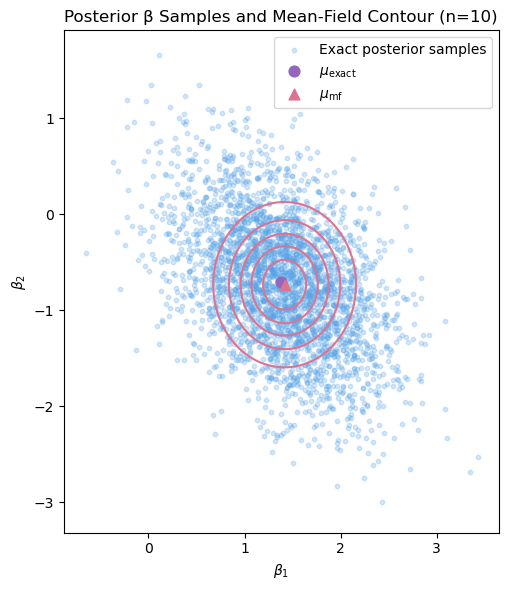

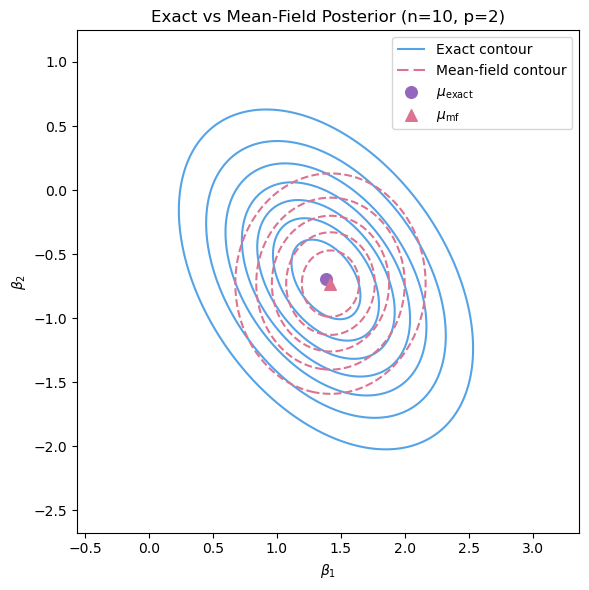

{'X': array([[ 1.0643877 ,  0.53857735],
        [-0.15685371, -0.82605248],
        [ 0.49093486, -0.23623963],
        [-0.14174865,  0.18682911],
        [ 0.103477  ,  0.33238957],
        [ 0.57186082, -0.79222029],
        [-0.06460516, -0.2058323 ],
        [ 1.63690413,  1.26976753],
        [-0.1011765 , -0.56661372],
        [-0.97961044, -0.00242125]]),
 'y': array([ 2.1989341 , -1.36820961,  2.8302379 , -0.70224898,  0.31828012,
         2.82227835,  0.25952265,  1.13717855,  1.7956019 , -0.05787366]),
 'mu_exact': array([ 1.38262326, -0.69853511]),
 'Sigma_exact': array([[ 0.32064777, -0.1505061 ],
        [-0.1505061 ,  0.42781701]]),
 'mu_mf': array([ 1.41777028, -0.73129038]),
 'Sigma_mf': array([[0.15600944, 0.        ],
        [0.        , 0.20933764]])}

In [115]:

plot_beta_scatter_with_mf_contour_from_data(
    X, y
)

visualize_p2_single_from_data(
    X, y
)


For this dataset, the mean-field posterior closely tracks the exact posterior mean, showing only a small shift, mainly along the second coordinate.

The covariance structure shows the classic mean-field limitation. The exact posterior covariance has clear correlation,but the mean-field approximation forces independence, setting off-diagonal entries to zero. Variances are also noticeably shrunk

Overall, the mean-field approximation captures the posterior **location** well but **underestimates uncertainty** and loses the negative correlation present in the true posterior.


# Problem 2


Define
$$
\tilde{\beta}_j = u_j v_j,\qquad j=1,\dots,p .
$$






Under the constraint $v_j = \beta_j / u_j$ (with $u_j \neq 0$), construct the objective 
$$
f(u_j)
= u_j^2 + \left( \frac{\beta_j}{u_j} \right)^2, 
$$

There is an optimization problem

$$
\min_{u_j v_j = \beta_j} f(u_j).
$$

with the derivative of object function is
$$
f'(u_j)
= 2u_j - 2\frac{\beta_j^2}{u_j^3}.
$$
Setting $f'(u_j) = 0$ yields
$$
u_j^4 = \beta_j^2
\quad\Longrightarrow\quad
u_j^2 = |\beta_j|.
$$
Hence 
$$
u_j = \pm\sqrt{|\beta_j|},
\qquad
v_j = \frac{\beta_j}{u_j}
= \pm\,\operatorname{sign}(\beta_j)\sqrt{|\beta_j|}
$$
satisfy the constraint and give the minimum.






Thus for each $\beta_j\neq 0$, the pair $(u_j,v_j)$ achieving the minimum is not unique.  
Indeed, both
$$
(u_j, v_j)
= \left(\sqrt{|\beta_j|},\, \operatorname{sign}(\beta_j)\sqrt{|\beta_j|}\right)
$$
and
$$
(u_j, v_j)
= \left(-\sqrt{|\beta_j|},\, -\operatorname{sign}(\beta_j)\sqrt{|\beta_j|}\right)
$$
produce the same product $\beta_j$ and the same minimal value $u_j^2 + v_j^2 = 2|\beta_j|$.
Hence $(u_j,v_j)$ is generally non-unique, whereas the induced coefficient
$$
\beta_j(\lambda) = \hat{u}_j(\lambda)\hat{v}_j(\lambda)
$$
is the unique Lasso solution $\hat{\beta}_j(2\lambda)$

Substituting into $u_j^2 + v_j^2$ gives the minimum value
$$
\min_{u_j v_j=\beta_j} (u_j^2 + v_j^2)
= |\beta_j| + |\beta_j|
= 2|\beta_j|.
$$




In the original formulation,
$$
\min_{u,v}
\sum_{i=1}^n\bigg(y_i - \sum_{j=1}^p x_{ij}u_jv_j\bigg)^2
+ \lambda \sum_{j=1}^p (u_j^2+v_j^2),
$$
the penalty term satisfies
$$
\min_{u_j v_j=\beta_j} \lambda (u_j^2+v_j^2)
= 2\lambda |\beta_j|.
$$

Thus, by substituting $\beta_j = u_j v_j$ and minimizing out $(u_j, v_j)$,
the entire problem is equivalent to
$$
\min_{\beta}
\sum_{i=1}^n\left(y_i - \sum_{j=1}^p x_{ij}\beta_j\right)^2
+ 2\lambda \sum_{j=1}^p |\beta_j|,
$$
which is exactly the Lasso problem with regularization parameter $2\lambda$:
$$
\hat{\beta}(2\lambda)
= \arg\min_{\beta}
\sum_{i=1}^n (y_i - x_i^\top\beta)^2
+ 2\lambda\|\beta\|_1.
$$



Let $(\hat{u}(\lambda), \hat{v}(\lambda))$ be any minimizer of the original problem.
Then the induced coefficient
$$
\beta_j(\lambda)
= \hat{u}_j(\lambda)\hat{v}_j(\lambda)
$$
must satisfy
$$
\beta_j(\lambda)
= \hat{\beta}_j(2\lambda),
$$
the Lasso solution at the scaled parameter $2\lambda$.

Note that $(u_j,v_j)$ is generally non-unique due to the sign symmetry
$$
(u_j, v_j)
\mapsto (-u_j, -v_j),
$$
but the product $\beta_j(\lambda) = u_j v_j$ is uniquely determined



## Simulation

To establish the conclusion, we first apply gradient descent to solve Problem 2 and obtain $u$ and $v$.
$$
L(u,v)=\sum_{i=1}^{n} r_i^2 + \lambda(\|u\|^2 + \|v\|^2), 
\qquad 
r_i = y_i - \sum_{j=1}^{p} x_{ij} u_j v_j.
$$

Gradient:

$$
\frac{\partial L}{\partial u_k}
=
-2 \sum_{i=1}^{n} x_{ik} v_k \, r_i
+ 2\lambda u_k ,
$$

$$
\frac{\partial L}{\partial v_k}
=
-2 \sum_{i=1}^{n} x_{ik} u_k \, r_i
+ 2\lambda v_k .
$$

In [116]:
import numpy as np

def solve_uv_gradient_descent(X, y, lam, lr=1e-3, max_iter=5000, tol=1e-6, verbose=False):
    n, p = X.shape
    
    # initialize u, v randomly
    u = np.random.randn(p) * 0.1
    v = np.random.randn(p) * 0.1

    for it in range(max_iter):

        # predicted value
        pred = X @ (u * v)

        # residual r = y - X(u * v)
        r = y - pred

        # gradients (derived analytically)
        # (p,) vector
        grad_u = -2 * (X * v).T @ r + 2 * lam * u
        grad_v = -2 * (X * u).T @ r + 2 * lam * v

        # step update
        u -= lr * grad_u
        v -= lr * grad_v

        # stopping by gradient norm
        grad_norm = np.sqrt(np.linalg.norm(grad_u)**2 + np.linalg.norm(grad_v)**2)
        if grad_norm < tol:
            if verbose:
                print(f"Converged at iter {it}, grad_norm={grad_norm:.3e}")
            break

        # if verbose and it % 200 == 0:
        #     loss = np.sum(r**2) + lam*(np.sum(u**2)+np.sum(v**2))
        #     print(f"Iter {it}, loss={loss:.6f}, grad_norm={grad_norm:.3e}")

    return u, v


For the Lasso problem (1), the solution path can be computed using a standard Lasso solver, as shown in the code below.



In the implementation below, note that the Lasso penalty corresponding to Problem 2 is $2\lambda$. Since sklearn minimizes
$$
\frac{1}{2n}||y - X\beta||^2 + \alpha|\beta|_1,
$$
the effective relation becomes $2n\alpha = 2\lambda$, hence
$\alpha = \lambda/n.$
This is why the Lasso solver uses `alpha = lam2 / n` in the code.




In [117]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


np.random.seed(0)
n, p = 100, 10
X = np.random.randn(n, p)

beta_true = np.zeros(p)
beta_true[[1, 3, 5]] = [2.0, -3.0, 1.5]  #
y = X @ beta_true + 0.5 * np.random.randn(n)


lams_2 = np.logspace(-2, 1, 10)  
betas_lasso = []
betas_uv = []

for lam2 in lams_2:

    u, v = solve_uv_gradient_descent(X, y, lam2, lr=1e-3, max_iter=20000)
    beta_uv = u * v
    betas_uv.append(beta_uv)

    clf = Lasso(alpha=lam2 / n, fit_intercept=False, max_iter=10000)
    clf.fit(X, y)
    betas_lasso.append(clf.coef_)

betas_lasso = np.array(betas_lasso)  
betas_uv = np.array(betas_uv)


diff_l2 = np.linalg.norm(betas_lasso - betas_uv, axis=1)

for lams, d in zip(lams_2, diff_l2):
    print(f"lambda = {lams:.4f}, ||β_lasso - β_uv||_2 = {d:.3e}")

print("Max diff：", diff_l2.max())




lambda = 0.0100, ||β_lasso - β_uv||_2 = 7.166e-06
lambda = 0.0215, ||β_lasso - β_uv||_2 = 6.678e-05
lambda = 0.0464, ||β_lasso - β_uv||_2 = 3.277e-05
lambda = 0.1000, ||β_lasso - β_uv||_2 = 3.227e-05
lambda = 0.2154, ||β_lasso - β_uv||_2 = 5.865e-05
lambda = 0.4642, ||β_lasso - β_uv||_2 = 3.109e-05
lambda = 1.0000, ||β_lasso - β_uv||_2 = 4.778e-05
lambda = 2.1544, ||β_lasso - β_uv||_2 = 9.960e-06
lambda = 4.6416, ||β_lasso - β_uv||_2 = 5.992e-06
lambda = 10.0000, ||β_lasso - β_uv||_2 = 1.546e-07
Max diff： 6.67758548386427e-05




From the numerical results, we see that the two solution paths coincide.
The following code illustrates this by plotting, for the case $p=2$, how $\beta$ for problem (1) and(2) evolve as $\lambda$ varies. The color gradient (from light to dark) indicates increasing values of $\lambda$.



In [118]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(0)
n, p = 100, 2                     # p=2 用于画路径图
X = np.random.randn(n, p)


beta_true = np.array([2.0, -3.0])   # p=2 的情形更好画图
y = X @ beta_true + 0.5 * np.random.randn(n)

lams = np.linspace(0.01, 3, 40)       # 0.01 ~ 10 --- IGNORE ---
betas_lasso = []
betas_uv = []

for lam in lams:

    # ---- uv reparameterization ----
    u, v = solve_uv_gradient_descent(X, y, lam,
                                     lr=1e-3, max_iter=20000)
    beta_uv = u * v
    betas_uv.append(beta_uv)

    # ---- sklearn Lasso ----
    clf = Lasso(alpha=lam / n, fit_intercept=False, max_iter=10000)
    clf.fit(X, y)
    betas_lasso.append(clf.coef_)

betas_lasso = np.array(betas_lasso)
betas_uv = np.array(betas_uv)





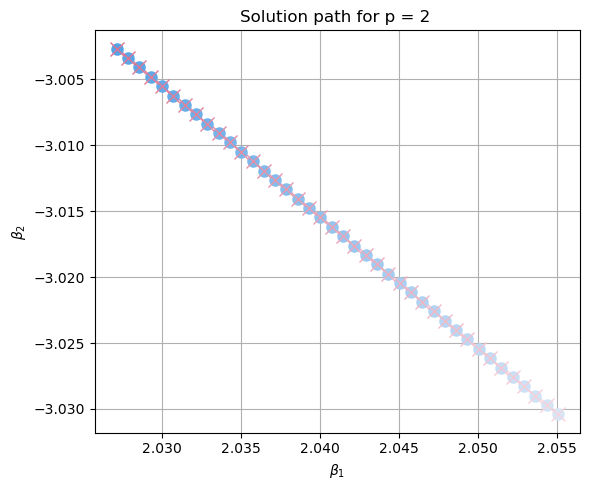

Max diff: 2.3731237034047653e-08


In [126]:


def truncate_cmap(cmap, minval=0.3, maxval=0.9, n=256):
    new_colors = cmap(np.linspace(minval, maxval, n))
    return LinearSegmentedColormap.from_list("trunc_cmap", new_colors)


from matplotlib.colors import LinearSegmentedColormap

cmap_lasso = LinearSegmentedColormap.from_list(
    "lasso_cmap", ["#D6E6F7", colors["B"]]
)
cmap_uv = LinearSegmentedColormap.from_list(
    "uv_cmap", ["#F7D4DD", colors["Pin"]]
)


norm = plt.Normalize(lams.min(), lams.max())

plt.figure(figsize=(6, 5))

for beta_lasso, beta_uv, lam in zip(betas_lasso, betas_uv, lams):
    color_lasso = cmap_lasso(norm(lam))
    color_uv = cmap_uv(norm(lam))

    # Lasso（蓝）
    plt.plot(beta_lasso[0], beta_lasso[1],
             'o', color=color_lasso, markersize=8)

    # uv（红）
    plt.plot(beta_uv[0], beta_uv[1],
             'x', color=color_uv, markersize=10)

plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("Solution path for p = 2 ")
plt.grid(True)
plt.tight_layout()
plt.show()


diff_l2 = np.linalg.norm(betas_lasso - betas_uv, axis=1)
print("Max diff:", diff_l2.max())



The plot shows that the two solution paths overlap almost perfectly, confirming their equivalence.

# Problem 3

In [ ]:
import os
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt


data_root = "/Users/revelyn/Codefild/MATH 5472/Assignment_4/MNIST"
# device = torch.device("cpu")  # 数据量小，CPU 就够了
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
torch.manual_seed(0)


transform = transforms.ToTensor()

dataset = MNIST(
    root=data_root,
    train=True,
    download=True,  
    transform=transform,
)

N_subset = 1000
indices = torch.randperm(len(dataset))[:N_subset]
imgs = torch.stack([dataset[i][0] for i in indices], dim=0)  # [N, 1, 28, 28]
X = imgs.view(N_subset, -1).float()  # [N, D]
X /= 255.0 if X.max() > 1.0 else 1.0

N, D = X.shape
print(f"Using {N} samples, dimension D = {D}")


mu = X.mean(dim=0, keepdim=True)
X_centered = X - mu

Using 1000 samples, dimension D = 784


In [ ]:



X_np = X_centered.numpy()

S = X_np.T @ X_np / N  # [D, D]
eigvals, eigvecs = np.linalg.eigh(S)   

idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Top 10 eigenvalues:", eigvals[:10])

Top 10 eigenvalues: [5.0237546 4.0311694 3.4523835 3.0000794 2.5183938 2.366296  1.7958567
 1.5229458 1.4190955 1.2414545]


In [ ]:


def ppca_log_likelihood_mle(eigvals, N, ks):
    D = len(eigvals)
    ll_list = []
    sigma2_list = []

    for k in ks:
        if k >= D:
            ll_list.append(np.nan)
            sigma2_list.append(np.nan)
            continue

        sigma2 = eigvals[k:].mean()  # σ²_MLE
        sigma2_list.append(sigma2)

        lambda_tilde = np.empty(D)
        lambda_tilde[:k] = eigvals[:k]
        lambda_tilde[k:] = sigma2

        logdetC = np.log(lambda_tilde).sum()
        trace_term = (eigvals / lambda_tilde).sum()

        ll = -0.5 * N * (D * np.log(2 * np.pi) + logdetC + trace_term)
        ll_list.append(ll / N)  

    return np.array(ll_list), np.array(sigma2_list)


ks = list(range(10, 301, 10))  # 10,20,...,300

ppca_ll, sigma2_mle_list = ppca_log_likelihood_mle(eigvals, N, ks)
print("pPCA MLE log-likelihood per sample (first few):", ppca_ll[:5])


pPCA MLE log-likelihood per sample (first few): [188.15096099 310.46813008 401.3857     472.99748296 533.60048604]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


class LinearVAE(nn.Module):

    def __init__(self, D, k):
        super().__init__()
        self.D = D
        self.k = k
        self.W = nn.Parameter(0.01 * torch.randn(D, k))
        self.log_sigma2 = nn.Parameter(torch.tensor(0.0))

    def elbo(self, x_centered):

        N, D = x_centered.shape
        k = self.k
        device = x_centered.device


        log_sigma2_clamped = torch.clamp(self.log_sigma2, min=-20, max=20)
        sigma2 = torch.exp(log_sigma2_clamped)


        WT_W = self.W.t() @ self.W
        M = WT_W + sigma2 * torch.eye(k, device=device)


        try:
            L = torch.linalg.cholesky(M)
            M_inv = torch.cholesky_inverse(L)
        except:
            M_inv = torch.inverse(M + 1e-6 * torch.eye(k, device=device))


        logdet_term = D * torch.log(sigma2) + torch.logdet(torch.eye(k, device=device) + WT_W / sigma2)

        
        S = (x_centered.t() @ x_centered) / N  # [D, D]

        trace_S = torch.trace(S)
        term1 = trace_S / sigma2

        WtS = self.W.t() @ S
        WtS_W = WtS @ self.W
        
        term2 = torch.trace(WtS_W @ M_inv) / sigma2

        trace_term = term1 - term2

        
        log_2pi = torch.log(torch.tensor(2 * torch.pi, device=device))
        log_marginal = -0.5 * N * (D * log_2pi + logdet_term + trace_term)
        
        elbo_per_sample = log_marginal / N

        return elbo_per_sample


def train_linear_vae(X_centered, ks, num_steps=3000, lr=1e-2):

    device = X_centered.device
    N, D = X_centered.shape
    elbos = []

    for k in ks:

        model = LinearVAE(D, k).to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr)

        best_elbo = -1e30
        
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

        for step in range(num_steps):
            optimizer.zero_grad()
            elbo = model.elbo(X_centered)
            loss = -elbo
            loss.backward()
            optimizer.step()
            scheduler.step()

            if elbo.item() > best_elbo:
                best_elbo = elbo.item()

        elbos.append(best_elbo)

    return np.array(elbos)


elbo_linear_vae = train_linear_vae(X_centered, ks, num_steps=3000, lr=1e-2)

In [ ]:

def ppca_log_likelihood_fixed_sigma(
    eigvals, N, ks, sigma2_fixed, sigma2_mle_list
):

    D = len(eigvals)
    ll_list = []

    for k, sigma2_mle in zip(ks, sigma2_mle_list):
        if k >= D:
            ll_list.append(np.nan)
            continue

        lambda_tilde = np.empty(D)
        lambda_tilde[:k] = eigvals[:k] - sigma2_mle + sigma2_fixed
        lambda_tilde[k:] = sigma2_fixed


        lambda_tilde = np.maximum(lambda_tilde, 1e-8)

        logdetC = np.log(lambda_tilde).sum()
        trace_term = (eigvals / lambda_tilde).sum()

        ll = -0.5 * N * (D * np.log(2 * np.pi) + logdetC + trace_term)
        ll_list.append(ll / N)

    return np.array(ll_list)

if 50 in ks:
    idx_50 = ks.index(50)
    sigma2_fixed = sigma2_mle_list[idx_50]
    print(f"\nUsing sigma^2_MLE(k=50) = {sigma2_fixed:.4f} as fixed sigma^2.")
else:
    idx_50 = len(ks) // 2
    sigma2_fixed = sigma2_mle_list[idx_50]
    print(f"\n50 not in ks, using k={ks[idx_50]} instead.")

ppca_ll_fixed = ppca_log_likelihood_fixed_sigma(
    eigvals, N, ks, sigma2_fixed, sigma2_mle_list
)





Using sigma^2_MLE(k=50) = 0.0117 as fixed sigma^2.


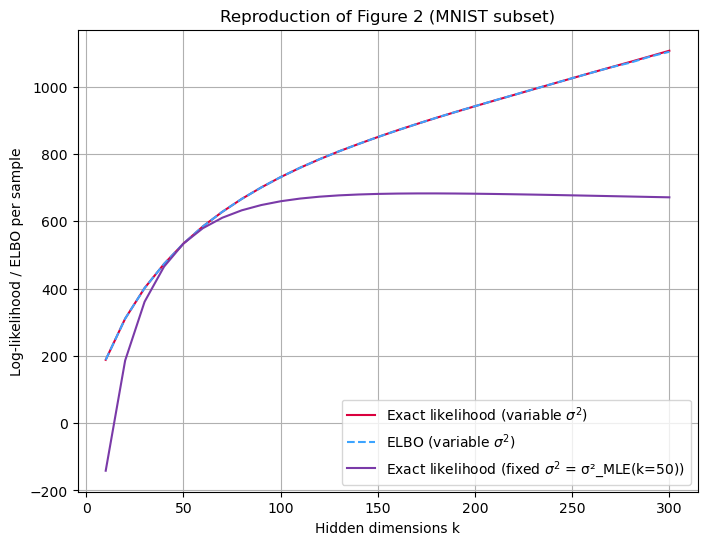

In [ ]:

plt.figure(figsize=(8, 6))

colors = {
    "B":   "#3CA4FF",   # light blue
    "Pin": "#DA003E",   # rose pink
    "Pur": "#7A3AA8"    # purple
}

plt.plot(ks, ppca_ll, label="Exact likelihood (variable $\sigma^2$)", color=colors["Pin"])
plt.plot(ks, elbo_linear_vae, "--", label="ELBO (variable $\sigma^2$)", color=colors["B"])
plt.plot(
    ks,
    ppca_ll_fixed,
    label=f"Exact likelihood (fixed $\sigma^2$ = σ²_MLE(k=50))",
    color=colors["Pur"],
)
plt.xlabel("Hidden dimensions k")
plt.ylabel("Log-likelihood / ELBO per sample")
plt.title("Reproduction of Figure 2 (MNIST subset)")
plt.legend()
plt.grid(True)
plt.show()



Here successfully reproduced the results of the paper using the MNIST dataset . The experiment yielded two key observations:

1.  **Verification of Lemma 1 & Theorem 1:** The ELBO of the Linear VAE (red dashed line) perfectly overlaps with the exact log-marginal likelihood of pPCA (green line) across all latent dimensions ($k$). This confirms that the Linear VAE recovers the true global optimum of pPCA and that the ELBO objective does not introduce spurious local maxima.
2.  **Impact of Observation Noise:** The model with fixed observation noise (blue line, $\sigma^2$ fixed at $k=50$ optimum) fails to improve as capacity increases ($k > 200$). This verifies the paper's claim that correctly learning $\sigma^2$ is essential to avoid posterior collapse; otherwise, the model prefers a sub-optimal solution even with higher capacity.